# Final Project
---------------------------------------------------------------------
## CIS 600 Fundamental Data & Knowledge Mining
## Prof. Ying Lin
## 11/8/2022

### Anthony Redamonti, Dana Dippery, Joshua, Hal Baird
### Syracuse University

### Section 1: Introduction 
The following project was implemented in Jupyter Notebooks using Anaconda 3 with Python 3 (ipykernel). The goal of the project is to build various models that are designed to solve a binary classification problem: Based on the training dataset, predict which SMS messages are SPAM.

Analyze the dataset provided in the file "SMSSpamCollection."
- Data Preparation
- Build, Tune, and Evaluate Various Machine Learning Algorithms
    - Naive Bayes Classifier (NBC)
    - K Nearest Neighbors (KNN)
    - Random Forest
    - Grandient Boosting Machine (GBM)

### Section 2: Data Preparation & EDA
- Divide HAM and SPAM messages
- Perform VADER sentiment analysis
- Use count vectorizer to remove words with numbers
- Append VADER sentiment analysis to new SPAM and HAM dataframes
- Drop duplicate entries
- Add binary attribute "IsSpam" to SPAM and HAM dataframes 
- Data Standardization/Normalization
- Use train_test_split to divide entries into training/testing data.
- Replace entries with missing data

In [54]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#### Section 2.1: Divide all SPAM and HAM messages
- The ham and spam messages are divided into lists below.
- The first word (HAM/SPAM) indicator has been removed from each message in the lists.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# return a complete string from a list of strings.
def listToString(s):
 
    str1 = ""
 
    for ele in s:
        str1 += ele
        str1 += " "
 
    return str1


# open the dataset
spamFile = open('SMSSpamCollection', 'r')
Lines = spamFile.readlines()

hamEntriesList = []
spamEntriesList = []

# sort the texts based on first word: spam or ham
for line in Lines:
    
    # Strips the newline character    
    line = line.strip()
    
    words = line.split()
    if(words[0] == "ham"):
        hamEntriesList.append(listToString(words[1:]))
    elif(words[0] == "spam"):
        spamEntriesList.append(listToString(words[1:]))
        
dfSpam = pd.DataFrame({'message': spamEntriesList})
dfHam = pd.DataFrame({'message': hamEntriesList})

#### Section 2.2: Perform Vader Analysis on Messages
- The messages in the HAM and SPAM dataframes will be analyzed using the VADER sentiment analyzer.
- The results of the analysis will be appended to the dataframes.

In [56]:
def performVaderAnalysis(dataframe):
    dataframe['compound'] = [analyzer.polarity_scores(x)['compound'] for x in dataframe['message']]
    dataframe['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dataframe['message']]
    dataframe['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dataframe['message']]
    dataframe['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dataframe['message']]

performVaderAnalysis(dfSpam)
performVaderAnalysis(dfHam)
print(dfSpam.head())

                                             message  compound    neg    neu  \
0  Free entry in 2 a wkly comp to win FA Cup fina...    0.7964  0.000  0.785   
1  FreeMsg Hey there darling it's been 3 week's n...    0.8395  0.054  0.693   
2  WINNER!! As a valued network customer you have...    0.9461  0.000  0.590   
3  Had your mobile 11 months or more? U R entitle...    0.8747  0.000  0.722   
4  SIX chances to win CASH! From 100 to 20,000 po...    0.7088  0.000  0.803   

     pos  
0  0.215  
1  0.252  
2  0.410  
3  0.278  
4  0.197  


#### Section 2.3: Use count vectorizer to remove words with numbers
- Below is the dataframe containing only SPAM messages.
- A count vectorizer is used to divide each message into individual words.
- Each word in the message is represented as a feature in the dataframe (column).
- The features in the dataframe that contain numbers will removed.

In [57]:
cv = CountVectorizer(stop_words='english') 
cv_matrix_spam = cv.fit_transform(dfSpam['message'])
df_dtm_spam = pd.DataFrame(cv_matrix_spam.toarray(), columns=cv.get_feature_names_out())
df_dtm_spam.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02072069400,...,yo,yourinclusive,yr,yrs,zebra,zed,zoe,zouk,ãº1,œharry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
def dropNumFeatures(columnList, dataframe):
    for word in columnList:
        wordStr = str(word)
        if(any(char.isdigit() for char in wordStr)):
            dataframe.drop(word, inplace = True, axis = 1)

column_headers_spam = df_dtm_spam.columns.values.tolist()

# remove words that contain numbers
dropNumFeatures(column_headers_spam, df_dtm_spam)

df_dtm_spam.head()

,ab,aberdeen,abroad,abta,abuse,ac,access,accessible,accident,accommodation,...,ymca,yo,yourinclusive,yr,yrs,zebra,zed,zoe,zouk,œharry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### The SPAM dataframe above has removed all words that contain numbers. 

In [59]:
cv = CountVectorizer(stop_words='english') 
cv_matrix_ham = cv.fit_transform(dfHam['message'])
df_dtm_ham = pd.DataFrame(cv_matrix_ham.toarray(), columns=cv.get_feature_names_out())
df_dtm_ham.head()

,000pes,0125698789,0quit,10,100,1000s,1030,11,1120,116,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zyada,ã¼,ãœ,éˆ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
column_headers_ham = df_dtm_ham.columns.values.tolist()                        

# remove words that contain numbers
dropNumFeatures(column_headers_ham, df_dtm_ham)

df_dtm_ham.head()

,____,aa,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zyada,ã¼,ãœ,éˆ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### The HAM dataframe above has removed all words that contain numbers. 

#### Section 2.5: Append VADER Analysis
- The VADER analysis will be appended to each entry.

In [61]:
df_dtm_spam['compound'] = dfSpam['compound']
df_dtm_spam['neg'] = dfSpam['neg']
df_dtm_spam['neu'] = dfSpam['neu']
df_dtm_spam['pos'] = dfSpam['pos']
df_dtm_ham['compound'] = dfHam['compound']
df_dtm_ham['neg'] = dfHam['neg']
df_dtm_ham['neu'] = dfHam['neu']
df_dtm_ham['pos'] = dfHam['pos']

df_dtm_spam.head()

,ab,aberdeen,abroad,abta,abuse,ac,access,accessible,accident,accommodation,...,yrs,zebra,zed,zoe,zouk,œharry,compound,neg,neu,pos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.7964,0.000,0.785,0.215
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.8395,0.054,0.693,0.252
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.9461,0.000,0.590,0.410
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.8747,0.000,0.722,0.278
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.7088,0.000,0.803,0.197


#### Section 2.6: Dropping Duplicate Entries
- Entries that are duplicates will be dropped from both SPAM and HAM dataframes.

In [29]:
originalLength = len(df_dtm_spam)

# drop all duplicate entries.
df_dtm_spam.drop_duplicates(inplace = True)

newLength = len(df_dtm_spam)
print("Number of SPAM duplicate entries dropped:", originalLength - newLength)

Number of SPAM duplicate entries dropped: 159


In [30]:
originalLength = len(df_dtm_ham)

# drop all duplicate entries.
df_dtm_ham.drop_duplicates(inplace = True)

newLength = len(df_dtm_ham)
print("Number of HAM duplicate entries dropped:", originalLength - newLength)

Number of HAM duplicate entries dropped: 360


#### Section 2.8: Add IsSpam Feature to SPAM and HAM Dataframes
- The target feature will be added to both the SPAM and HAM dataframes.

In [31]:
# add a column indicating whether it's a SPAM message.
spamList = []
for x in range(len(df_dtm_spam)):
    spamList.append(1)
spamArray = np.array(spamList)
df_dtm_spam['IsSpam'] = spamArray

# add a column indicating whether it's a SPAM message.
hamList = []
for x in range(len(df_dtm_ham)):
    hamList.append(0)
hamArray = np.array(hamList)
df_dtm_ham['IsSpam'] = hamArray

#### Section 2.6: Data Standardization/Normalization
- The numeric ratio features will be standardized and normalized before the dataframe can be used to build any models.
- The fit_transform method of the scaler class is used to fit and transform a dataframe's features independently. 
- After transformation, each numeric ratio feature will have:
    - Mean == 0
    - Variance == 1

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import var

vaderFeatures = ['pos', 'neg', 'compound', 'neu']

def standNormVader(dataframe):
    scaler = StandardScaler()
    
    # create a dataframe with only the numeric Vader features.
    X_vader = pd.DataFrame()
    
    for feature in vaderFeatures:
        X_vader = pd.concat([X_vader, dataframe[feature]], axis = 1)

    # fit and transform the features.
    X_vader_scaled = scaler.fit_transform(X_vader)

    # convert the numpy array to dataframe
    X_vader_scaled_df = pd.DataFrame(X_vader_scaled)

    # name the columns of the dataframe
    X_vader_scaled_df.columns = vaderFeatures

    # overwrite the old numeric vader features with the transformed numeric vader features.
    for feature in vaderFeatures:
        dataframe[feature] = X_vader_scaled_df[feature]
        
standNormVader(df_dtm_ham)
standNormVader(df_dtm_spam)

In [33]:
# create a dataframe with only the numeric Vader features.
X_vader = pd.DataFrame()

for feature in vaderFeatures:
    X_vader = pd.concat([X_vader, df_dtm_ham[feature]], axis = 1)

print("MEAN OF NUMERIC RATIO FEATURES:")
mean(X_vader, axis = 0)

MEAN OF NUMERIC RATIO FEATURES:


pos         0.004361
neg        -0.000658
compound    0.001687
neu        -0.003695
dtype: float64

In [34]:
print("VARIANCE OF NUMERIC RATIO FEATURES:")
var(X_vader, axis = 0)

VARIANCE OF NUMERIC RATIO FEATURES:


pos         1.010212
neg         0.993520
compound    1.009420
neu         1.003436
dtype: float64

- After standardization/normalization, the numeric vader features have the following properties:
    - The mean is approximately zero.
    - The variance is 1.0.

#### Section 2.8: Train Test Split
- The data will now be divided for model building using train_test_split.
- X_train represents 70% of the training dataset used for training purposes. 
- X_test represent 30% of the training dataset used for testing purposes.
- X_test is really the validation dataset because it originates from the training dataset.
- y_train represents the label "IsSpam" in the dataset, which is known.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn import metrics

# target attribute
y_spam = df_dtm_spam['IsSpam']
y_ham = df_dtm_ham['IsSpam'] 

# drop the target attribute from the dataframes
df_dtm_spam.drop('IsSpam', inplace = True, axis = 1)
df_dtm_ham.drop('IsSpam', inplace = True, axis = 1)

X_spam = df_dtm_spam
X_ham = df_dtm_ham

# 70% training: X_ham_train, X_spam_train
# 30% testing: X_ham_test, X_spam_test
X_ham_train, X_ham_test, y_ham_train, y_ham_test = train_test_split(X_ham, y_ham, test_size = 0.3, random_state = 16)
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(X_spam, y_spam, test_size = 0.3, random_state = 16)

# combine all train and test entries
all_X_train_df = pd.concat([X_ham_train, X_spam_train], sort=False)
all_X_test_df = pd.concat([X_ham_test, X_spam_test], sort=False)
all_y_train_df = pd.concat([y_ham_train, y_spam_train], sort=False)
all_y_test_df = pd.concat([y_ham_test, y_spam_test], sort=False)

In [36]:
all_X_train_df.head()

,____,aa,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,...,xxxxxx,yards,yer,yhl,ymca,yourinclusive,zebra,zed,zouk,œharry
3184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Section 2.7: Replace Entries with Missing Data
- The entries of the SPAM and HAM dataframes will be checked for missing data.

In [37]:
all_X_train_df.fillna(0, inplace = True)
all_X_test_df.fillna(0, inplace = True)
all_X_train_df.head()

,____,aa,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,...,xxxxxx,yards,yer,yhl,ymca,yourinclusive,zebra,zed,zouk,œharry
3184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 3: Build, Tune, and Evaluate Various Machine Learning Models

#### Section 3.2: Building a K-Nearest Neighbors (KNN) Model
- The KNN model is a distance-based machine learning algorithm used for solving regression and classification problems.
- It assumes entries belong to the same group as those closest to it. 
- The K in KNN is the hyperparameter that specifies how many nearest neighbors to consider when classifying an entry.
- X_train and y_train are used in clf.fit to build a KNN model.
- Once the model is built, it is used to predict the target label using X_test. 

In [38]:
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clfKnn = KNeighborsClassifier()
clfKnn.fit(all_X_train_df, all_y_train_df)
y_pred = clfKnn.predict(all_X_test_df)

print(f"Accuracy: {round( metrics.accuracy_score(all_y_test_df, y_pred) * 100, 2)}%")
df_confusion = pd.crosstab(all_y_test_df, y_pred)
df_confusion

Accuracy: 89.86%


col_0,0,1
IsSpam,,
0,1341,0
1,154,23


##### The accuracy of the KNN model is 89.86%. The model will now be tested using two forms of cross-validation to improve performance.
- The two methods of cross-validation to be tested are: ShuffleSplit and KFold.
##### ShuffleSplit Method
- Shufflesplit is a method of sampling data during the cross-validation stage. 
- It will randomly sample data for each iteration.
- It will be used below to generate random samples of training/validation data. 
- The size of the data samples is set using the test_size parameter.
- The number of sections to split the data is set by the n_splits parameter.
##### KFold Method
- K-fold is a method of sampling data during the cross-validation stage.
- It will divide the samples into K number of sections. 
- One section will be for validation purposes. 
- The remaining sections will be for training purposes.
- The sections are swapped between iterations.
- The number K is set using the n_splits parameter.

In [39]:
# Get Repeated Hold Out Accuracy of Model
from sklearn.model_selection import KFold, ShuffleSplit

crossValShuffSplit = ShuffleSplit(n_splits = 15, test_size = 0.3, random_state=20)
accuracyShuffSplit = cross_val_score(clfKnn, all_X_train_df, all_y_train_df, cv=crossValShuffSplit).mean()*100
accuracyShuffSplit = round(accuracyShuffSplit, 2)
print("Accuracy using ShuffleSplit cross validation: " + str(accuracyShuffSplit))

crossValKFold = KFold(n_splits = 15, shuffle = True, random_state=20)
accuracyKFold = cross_val_score(clfKnn, all_X_train_df, all_y_train_df, cv=crossValKFold).mean()*100
accuracyKFold = round(accuracyKFold, 2)
print("Accuracy using KFold cross validation: " + str(accuracyKFold))

Accuracy using ShuffleSplit cross validation: 89.44
Accuracy using KFold cross validation: 90.24


##### ShuffleSplit Accuracy: 89.44%
##### K-Fold Accuracy: 90.24%
- The KFold method of cross-validation out-performed the ShuffleSplit method.
- The KFold method of cross-validation will be selected for future hyperparameter tuning.

##### Sensitivity Analysis: The model will now be tested using various nearest neighbors.
- Sensitivitiy analysis will now be performed on various values of nearest neighbors.
- The accuracy will be plotted on a 2D plot for each neighbor value tested.

1 nearest neighbors produced 92.36% test accuracy.
3 nearest neighbors produced 90.91% test accuracy.
10 nearest neighbors produced 88.6% test accuracy.
20 nearest neighbors produced 88.41% test accuracy.
22 nearest neighbors produced 88.34% test accuracy.
24 nearest neighbors produced 88.34% test accuracy.
26 nearest neighbors produced 88.34% test accuracy.
28 nearest neighbors produced 88.34% test accuracy.
30 nearest neighbors produced 88.34% test accuracy.


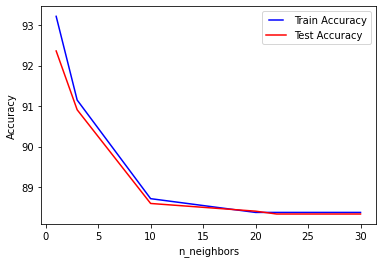

In [40]:
## Sensitivity Analysis 
from matplotlib.legend_handler import HandlerLine2D

neighbors = [1, 3, 10, 20, 22, 24, 26, 28, 30]
train_results = []
test_results = [] 
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(all_X_train_df, all_y_train_df)
    train_pred = model.predict(all_X_train_df)
    accuracy_train = cross_val_score(model, all_X_train_df, all_y_train_df, cv = crossValKFold).mean() * 100
    train_results.append(accuracy_train)
    y_pred = model.predict(all_X_test_df)
    accuracy_test = round(metrics.accuracy_score(all_y_test_df, y_pred)*100, 2)
    test_results.append(accuracy_test)
    print(str(n)+ " nearest neighbors produced "+ str(accuracy_test) + "% test accuracy.")
    
line1, = plt.plot(neighbors, train_results, 'b', label = "Train Accuracy")
line2, = plt.plot(neighbors, test_results, 'r', label = "Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.show()

##### The nearest neighbor value with the highest accuracy was 1.
- n_neighbors = 1 produced an accuracy of 92.36%.
- n_neighbors will be 1 for future hyperparameter tuning.

##### Hyperparameter Tuning: GridSearchCV
- GridSearchCV will be used to tune the hyperparameters of the model.

In [41]:
## KNN Model Tuning 
from sklearn.model_selection import GridSearchCV

knnModel = KNeighborsClassifier(n_neighbors = 30)
knnModel.fit(all_X_train_df, all_y_train_df)

param_grid = {'n_neighbors': [1, 3, 5, 10, 12, 22],
             'metric': ['minkowski', 'euclidean', 'manhattan'],
             'weights': ['distance', 'uniform']}
knnClassifier = GridSearchCV(knnModel, param_grid)
knnClassifier.fit(all_X_train_df, all_y_train_df)

# Hyperparameters for Best Performing Model
print(f"Accuracy: {round(knnClassifier.best_score_*100, 2)}%")
for key, value in knnClassifier.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 93.07%
Hyperparameter: metric; Value: manhattan
Hyperparameter: n_neighbors; Value: 1
Hyperparameter: weights; Value: distance


In [42]:
pred_knn = knnClassifier.best_estimator_.predict(all_X_test_df)
print(f"Accuracy: {round( metrics.accuracy_score(all_y_test_df, pred_knn) * 100, 2)}%")

Accuracy: 92.82%


- The hyperparameters that yielded the highest accuracy for the KNN model are below.
    - Nearest Neighbors: 1
    - Metric: Manhattan
    - Weights: Distance
- The best performance score (accuracy) was 93.07%.  
- The accuracy of the prediction was 92.82%.

#### Section 3.3: Building a Gaussian Naive Bayes Classifier (NBC) Model
- Naive Bayes Classifier operates under the assumption that all features are independent of one another. 
- It also assumes that each feature contributes equally to the outcome (has equal weight).
- While these assumptions make the machine learning algorithm "naive," the model typically performs well in real-world applications.
- X_train and y_train are used in cross_val_score to build a Gaussian NBC model.
- Once the model is built, it is used to predict the target label using X_test. 

In [43]:
## Ensemble Learning: Bagging Classifier
from sklearn.naive_bayes import GaussianNB

gnbModel = GaussianNB()
gnbResults = cross_val_score(gnbModel, all_X_train_df, all_y_train_df, cv = crossValKFold)
print(f"Accuracy: {round( gnbResults.mean() * 100, 2)}%")

Accuracy: 88.44%


##### Using the default settings of the Gaussian Naive Bayes Classifier, the model produced an accuracy of 88.44%.

##### The model's hyperparameters will now be tuned to find the hyperparameters that yield the highest accuracy.
- The GridSearchCV method will be used to exhaustively tune the hyperparameters.

In [44]:
param_grid_gnb = {'var_smoothing': [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]}
gnbClassifier = GridSearchCV(gnbModel, param_grid_gnb)
gnbClassifier.fit(all_X_train_df, all_y_train_df)

# Hyperparameters for Best Performing Model
print(f"Accuracy: {round(gnbClassifier.best_score_*100, 2)}%")
for key, value in gnbClassifier.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 88.75%
Hyperparameter: var_smoothing; Value: 1e-05


In [45]:
pred_nbc = gnbClassifier.best_estimator_.predict(all_X_test_df)
print(f"Accuracy: {round( metrics.accuracy_score(all_y_test_df, pred_nbc) * 100, 2)}%")

Accuracy: 87.88%


- Increasing the hyperparameter "Var Smoothing" widens the Gaussian curve's low-pass filter, accepting more samples that are close to the feature's mean value. 
- Decreasing it narrows the filter, allowing fewer samples to pass.
- The value of "Var Smoothing" that yielded the highest accuracy for the NBC model is shown below.
    - Var Smoothing: 1e-05
- The best performance score (accuracy) was 88.75%. 
- The accuracy of the prediction was 87.88%.

#### Section 3.4: Building a Random Forest Classifier (RFC) Model
- The RFC model is a popular ensemble learning model used to solve regression and classification problems.
- Ensemble learning involves combining the probabilities of many poor performing base classifiers to build a strong model.
- Essentially, RFC works by building multiple binary search trees.
- Each tree is fit with a unique combination of features, making it very difficult to overfit the model.
- X_train and y_train are used in cross_val_score to build a Random Forest Classifier.
- Once the model is built, it is used to predict the target label using X_test. 

In [46]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier(n_estimators = 100, max_features = 4, random_state = 16)
randForestResults = cross_val_score(randForestModel, all_X_train_df, all_y_train_df, cv=crossValKFold)
print(f"Accuracy: {round( randForestResults.mean() * 100, 2)}%")

Accuracy: 96.72%


##### Using the number of estimators = 100 and max_features = 4, the model produced an accuracy of 96.72%.

##### The model's hyperparameters will now be tuned to find the hyperparameters that yield the highest accuracy.
- The GridSearchCV method will be used to exhaustively tune the hyperparameters.

In [47]:
param_grid_rfc = {'n_estimators': [50, 100, 150, 200],
             'criterion': ['gini', 'entropy'],
             'max_features': ['sqrt', 'log2', None]}
rfcClassifier = GridSearchCV(randForestModel, param_grid_rfc)
rfcClassifier.fit(all_X_train_df, all_y_train_df)

# Hyperparameters for Best Performing Model
print(f"Accuracy: {round(rfcClassifier.best_score_*100, 2)}%")
for key, value in rfcClassifier.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 98.42%
Hyperparameter: criterion; Value: gini
Hyperparameter: max_features; Value: sqrt
Hyperparameter: n_estimators; Value: 200


In [48]:
pred_rfc = rfcClassifier.best_estimator_.predict(all_X_test_df)
print(f"Accuracy: {round( metrics.accuracy_score(all_y_test_df, pred_rfc) * 100, 2)}%")

Accuracy: 98.48%


- The hyperparameter that yielded the highest accuracy for the RFC model are below.
    - number of estimators: 200
    - criterion: gini
    - max features: sqrt
- The best performance score (accuracy) was 98.42%.
- The accuracy of the prediction was 98.48%.

##### The feature_importances_ attribute of the random forest classifier measures how prevolent a feature is in the forest. It answers the question, how often does an attribute appear in each tree?

In [49]:
## Feature Importance 
randForestModel.fit(all_X_train_df, all_y_train_df)
featureImportanceRfc = pd.DataFrame(randForestModel.feature_importances_, index = all_X_train_df.columns,
                                columns = ['importance']).sort_values('importance', ascending=False)
featureImportanceRfc

,importance
neg,0.069995
pos,0.023694
neu,0.018285
mobile,0.014246
txt,0.014143
...,...
ujhhhhhhh,0.000000
ugadi,0.000000
typical,0.000000
coupla,0.000000


##### The features that appeared the most in each tree were the following: neg, pos, neu, mobile, and txt.

#### Section 3.5: Building a Gradient Boosting Machine (GBM) Model
- The GBM model is another ensemble learning method, which typically uses the binary search tree as its base classifier.
- Between iterations of the base classifier, GBM will increase the weight of areas in the dataset that contain incorrectly classified entries.
- The final model is less likely to make the same classification errors as the base classifiers used to build it.
- Because the GBM is built sequentially using the base classifiers, it generally takes a longer amount of time to build than other machine learning methods.
- X_train and y_train are used in cross_val_score to build a GBM Model.
- Once the model is built, it is used to predict the target label using X_test. 

In [50]:
## Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
gbmModel = gbm(n_estimators=100, random_state = 16)
gbmResults = cross_val_score(gbmModel, all_X_train_df, all_y_train_df, cv=crossValKFold)
print(f"Accuracy: {round( gbmResults.mean() * 100, 2)}%")

Accuracy: 97.68%


##### Using the number of estimators = 100, the model produced an accuracy of 97.68%.

In [51]:
## Model Tuning 
from sklearn.model_selection import GridSearchCV

param_grid_gbm = {'max_features': ['sqrt', 'log2', 'auto'],
             'n_estimators': [10, 50, 100, 150],
             'criterion': ['friedman_mse', 'squared_error']}
gbmClassifier = GridSearchCV(gbmModel, param_grid_gbm)
gbmClassifier.fit(all_X_train_df, all_y_train_df)

# Hyperparameters for Best Performing Model
print(f"Accuracy: {round(gbmClassifier.best_score_*100, 2)}%")
for key, value in gbmClassifier.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 97.88%
Hyperparameter: criterion; Value: friedman_mse
Hyperparameter: max_features; Value: auto
Hyperparameter: n_estimators; Value: 150


In [52]:
pred_gbm = gbmClassifier.best_estimator_.predict(all_X_test_df)
print(f"Accuracy: {round( metrics.accuracy_score(all_y_test_df, pred_gbm) * 100, 2)}%")

Accuracy: 97.63%


- The hyperparameter that yielded the highest accuracy for the Gradient Boosting Machine model are below.
    - number of estimators: 150
    - criterion: friedman_mse
    - max features: auto
- The best performance score (accuracy) was 97.88%.
- The accuracy of the prediction was 97.63%.

In [53]:
## Feature Importance 
gbmModel.fit(all_X_train_df, all_y_train_df)
featureImportanceGbm = pd.DataFrame(gbmModel.feature_importances_, index = all_X_train_df.columns,
                                columns = ['importance']).sort_values('importance', ascending=False)
featureImportanceGbm

,importance
neg,0.643226
pos,0.048001
claim,0.035553
txt,0.027828
free,0.026209
...,...
heard,0.000000
hear,0.000000
heap,0.000000
healthy,0.000000


##### The features that appeared the most in each tree were the following: neg, pos, claim, txt, and free.

### Section 5: Results & Conclusion
- The four models are ranked below in order of their accuracy percentage.
    - 1. Random Forest Classifier (RFC): 98.48%
    - 2. Gradient Boosting Machine (GBM) Classifier: 97.63%
    - 3. K-Nearest Neighbors (KNN) Classifier: 92.82%
    - 4. Gaussian Naive Bayes Classifier (NBC): 87.88%
- The model that performed the best was the Random Forest Classifier (RFC).
    - RFC is an ensemble learning method. 
    - One interesting quality of the RFC is its attribute "feature_importance_," which measures each feature's frequency of use in each binary decision tree used to build the model. 
- Gradient Boosting Machine (GBM) finished in second place. 
    - GBM works by sequentially testing each model against the training data, improving its performance with each iteration.
    - Because it uses sequential operations, it typically takes a longer amount of time to perform its operation, but the performance is usually high.
- K-Nearest Neighbors (KNN) finished in third place.
    - KNN is a distance-based, supervised learning algorithm that generally yields high performance in real-world applications as it can tolerate a large, noisy dataset.
    - There are four methods used to calculate the distance between entries: Euclidian, Manhattan, Hamming, and Minkowski.
    - The distance calculation that yielded the best performance was Manhattan.
- Gaussian Naive Bayes Classifier (NBC) finished in fourth place. 
    - Perhaps its poor perforance is due the assumption that all features are truely independent and of equal weight.